In [1]:
def read_formatted_data(filename):
    with open(filename, "r") as file:
        reader = csv.reader(filename, delimiter='\t')
        lines = reader.readlines()


In [109]:
import csv
filename = "./smalloutput/model1_formatted_train.tsv"


def read_formatted_data(filename):
    with open(filename, "r") as file:
        reader = csv.reader(file, delimiter='\t')
        lines = list(reader)

    # first retrieve labels
    y = [int(line.pop(0)) for line in lines]

    # store as list of dicts, making sure to include bias feature!
    # to account for the bias now being '0', must increment the keys
    X = []
    for line in lines:
        x = dict([[int(elem.split(':')[0])+1, int(elem.split(':')[1])] for elem in line])
        x[0] = 1
        X.append(x)

    return y, X

In [110]:
train_labels, train_data = read_formatted_data(filename)

In [17]:
def write_formatted_data(data, labels, filename):
    with open(filename, 'w') as file:
        for idx, row in enumerate(data):
            string = str(labels[idx]) + '\t' + '\t'.join([str(_vocab[word]) + ':1' for word in row]) + '\n'

In [31]:
import numpy as np

def sigmoid(z):
    return (1.0 / (1 + np.exp(-z)))


In [28]:
mylist = [1,2,3,4,5]
test_list(mylist)
print(mylist)

[2, 3, 4, 5, 6]


In [30]:
def sparse_dot(X, Y):
    """Expecting X to be the sparse one."""
    product = 0.0
    for i, x in X.items():
        product += x * Y[i]
    return product

def sparse_add(X, Y):
    """Expecting X to be the sparse one."""
    Y_new = Y.copy()
    for i, x in X.items():
        Y_new[i] += x
    return Y_new
    
def sparse_sub(X, Y):
    """Expecting X to be the sparse one."""
    Y_new = Y.copy()
    for i, x in X.items():
        Y_new[i] -= x
    return Y_new

In [35]:
fun = {1:2, 3:4, 5:6}
sad = fun.copy()
sad[7] = 444
print(sad)
print({x:y*30 for x,y in sad.items()})

{1: 2, 3: 4, 5: 6, 7: 444}
{1: 60, 3: 120, 5: 180, 7: 13320}


In [37]:
def SGD(theta, eta, x_i, y_i):
    # calc the scalar constant for this data point
    q = y_i - sigmoid(sparse_dot(x_i, theta))
    
    # now multiply the two constants
    c = q * eta
    
    # and multiply every entry of x_i by c in preparation for the update
    x_i = {i: val*c for i, val in x_i.items()}
    
    # finally perform the update
    for i, x in x_i.items():
        theta[i] += x
        
    return theta

In [41]:
def read_vocab(filename):
    with open(filename, 'r') as file:
        lines = map(lambda x : x.split(), file.readlines())
        return {row[0] : int(row[1]) for row in lines}
_vocab = read_vocab('dict.txt')

In [144]:
def predict(x_i, theta):
    prob = sparse_dot(x_i, theta)
    if sigmoid(prob) > 0.5:
        return 1
    else:
        return 0

In [111]:
# theta will be of length M+1 where M is the size of the vocab
M = len(_vocab)
theta = np.zeros(M+1)       # initialize all params to 0 (folding in bias)
rate = 0.1

# for num_epochs we perform SGD on the entire dataset
for epoch in range(30):     # for specified iterations
    print(f"Epoch: {epoch}")
    for i, x_i in enumerate(train_data):                # for each data point
        s = theta.copy()
        theta = SGD(theta, rate, x_i, train_labels[i])
        if np.array_equal(s,theta):
            print("NONONONO")

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
NONONONO
Epoch: 9
NONONONO
Epoch: 10
NONONONO
Epoch: 11
NONONONO
Epoch: 12
NONONONO
Epoch: 13
NONONONO
Epoch: 14
NONONONO
Epoch: 15
NONONONO
Epoch: 16
NONONONO
Epoch: 17
NONONONO
Epoch: 18
NONONONO
Epoch: 19
NONONONO
Epoch: 20
NONONONO
Epoch: 21
NONONONO
Epoch: 22
NONONONO
Epoch: 23
NONONONO
Epoch: 24
NONONONO
Epoch: 25
NONONONO
Epoch: 26
NONONONO
Epoch: 27
NONONONO
Epoch: 28
NONONONO
Epoch: 29
NONONONO


In [114]:
Y = []
for x_i in train_data:
    Y.append(predict(x_i, theta))

arr = np.array(Y)
arr2 = np.array(train_labels)
error = np.mean(arr != arr2)
error

0.005714285714285714

In [118]:
def neg_log_likelihood(theta, X, y):
    total = 0.0
    for idx, x_i in enumerate(X):
        t_x = sparse_dot(x_i, theta)
        term_1 = -y[idx] * t_x
        term_2 = np.log(1 + np.exp(t_x))
        total += term_1 + term_2

    return total


def error(X, Y):
    return np.mean(np.array(X) != np.array(Y))

### example usage of feature.py
python feature.py smalldata\smalltrain_data.tsv smalldata\smallvalid_data.tsv smalldata\smalltest_data.tsv dict.txt test\formatted_train.tsv test\formatted_valid.tsv test\formatted_test.tsv 1

### example usage of lr.py
python lr.py smalloutput\model1_formatted_train.tsv smalloutput\model1_formatted_valid.tsv smalloutput\model1_formatted_test.tsv dict.txt test\train.labels test\test.labels test\metrics.txt 30

In [120]:
error(train_labels, Y)

0.005714285714285714

In [139]:
    train_in = "./largeoutput/model1_formatted_train.tsv"
    valid_in = "./largeoutput/model1_formatted_valid.tsv"
    test_in = "./largeoutput/model1_formatted_test.tsv"
    
    train_labels, train_data = read_formatted_data(train_in)
    valid_labels, valid_data = read_formatted_data(valid_in)
    test_labels, test_data = read_formatted_data(test_in)

In [140]:
    # 2a: Set up variables etc.
    # theta will be of length M+1 where M is the size of the vocab
    M = len(_vocab)
    theta = np.zeros(M+1)       # initialize all params to 0 (folding in bias)
    LEARNING_RATE = 0.1

In [141]:
# 2b: Perform SGD to minimize the objective fn
# for num_epochs, iterate over the entire dataset
num_epochs = 200
N_train = 1.0 / len(train_data)
N_valid = 1.0 / len(valid_data)
nll_train = []
nll_valid = []
x_axis = np.arange(num_epochs)

for epoch in range(num_epochs):     # for specified iterations
    print("Epoch:", epoch)    # debug
    for i, x_i in enumerate(train_data):                # for each data point
        SGD(theta, LEARNING_RATE, x_i, train_labels[i])

    nll_train.append(N_train * neg_log_likelihood(theta, train_data, train_labels))
    nll_valid.append(N_valid * neg_log_likelihood(theta, valid_data, valid_labels))


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100

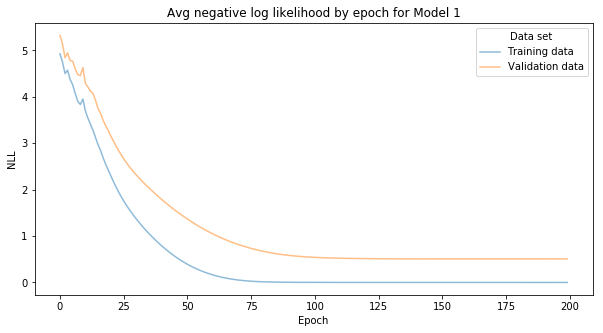

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

# first the training
plt.plot(x_axis, nll_train, linestyle='-', alpha=0.5, color='C0', label = 'Training data')
plt.plot(x_axis, nll_valid, linestyle='-', alpha=0.5, color='C1', label = 'Validation data')

plt.legend(title = 'Data set', loc = 'best')
plt.title("Avg negative log likelihood by epoch for Model 1")
plt.xlabel('Epoch')
plt.ylabel('NLL')
plt.savefig('model_1_plot.png')
plt.show()

In [133]:
    train_in = "./largeoutput/model2_formatted_train.tsv"
    valid_in = "./largeoutput/model2_formatted_valid.tsv"
    test_in = "./largeoutput/model2_formatted_test.tsv"
    
    train_labels, train_data = read_formatted_data(train_in)
    valid_labels, valid_data = read_formatted_data(valid_in)
    test_labels, test_data = read_formatted_data(test_in)

In [135]:
# 2a: Set up variables etc.
# theta will be of length M+1 where M is the size of the vocab
M = len(_vocab)
theta = np.zeros(M+1)       # initialize all params to 0 (folding in bias)
LEARNING_RATE = 0.1

# 2b: Perform SGD to minimize the objective fn
# for num_epochs, iterate over the entire dataset
num_epochs = 200
N_train = 1.0 / len(train_data)
N_valid = 1.0 / len(valid_data)
nll_train = []
nll_valid = []
x_axis = np.arange(num_epochs)

for epoch in range(num_epochs):     # for specified iterations
    print("Epoch:", epoch)    # debug
    for i, x_i in enumerate(train_data):                # for each data point
        SGD(theta, LEARNING_RATE, x_i, train_labels[i])

    nll_train.append(N_train * neg_log_likelihood(theta, train_data, train_labels))
    nll_valid.append(N_valid * neg_log_likelihood(theta, valid_data, valid_labels))

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100

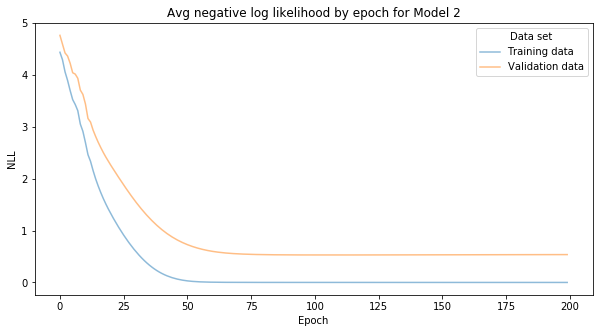

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

# first the training
plt.plot(x_axis, nll_train, linestyle='-', alpha=0.5, color='C0', label = 'Training data')
plt.plot(x_axis, nll_valid, linestyle='-', alpha=0.5, color='C1', label = 'Validation data')

plt.legend(title = 'Data set', loc = 'best')
plt.title("Avg negative log likelihood by epoch for Model 2")
plt.xlabel('Epoch')
plt.ylabel('NLL')
plt.savefig('model_2_plot.png')
plt.show()

In [147]:
train_in = "./largeoutput/model2_formatted_train.tsv"
valid_in = "./largeoutput/model2_formatted_valid.tsv"
test_in = "./largeoutput/model2_formatted_test.tsv"

train_labels, train_data = read_formatted_data(train_in)
valid_labels, valid_data = read_formatted_data(valid_in)
test_labels, test_data = read_formatted_data(test_in)
    
    # 2a: Set up variables etc.
# theta will be of length M+1 where M is the size of the vocab
M = len(_vocab)
theta = np.zeros(M+1)       # initialize all params to 0 (folding in bias)
LEARNING_RATE = 0.1

# 2b: Perform SGD to minimize the objective fn
# for num_epochs, iterate over the entire dataset
num_epochs = 50

for epoch in range(num_epochs):     # for specified iterations
    print("Epoch:", epoch)    # debug
    for i, x_i in enumerate(train_data):                # for each data point
        SGD(theta, LEARNING_RATE, x_i, train_labels[i])

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49


In [148]:
print(error(train_labels, [predict(x_i, theta) for x_i in train_data]))
print(error(test_labels, [predict(x_i, theta) for x_i in test_data]))

0.014166666666666666
0.1975
